In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from matplotlib import colors as mcolors

import datetime
import time
import os
import datetime

mpl.rcParams['figure.figsize'] = (12, 5)

In [9]:
DATA_FOLDER = 'data'
lengths = {
    'Pulp Fiction': (2*60*60 + 40*60 + 53),
    'Kill Bill: Vol. 1': (1*60*60 + 50*60 + 43),
    'Kill Bill: Vol. 2': (2*60*60 + 16*60 + 57),
    'Reservoir Dogs': (1*60*60 + 39*60 + 6),
    'Inglourious Basterds': (2*60*60 + 32*60 + 52)
}

In [10]:
data = {}
actors = []
for f in os.listdir(DATA_FOLDER):
    title = os.path.splitext(f)[0]
    df = pd.read_csv(os.path.join(DATA_FOLDER, f), index_col=0, low_memory=False)
    fps = df['frame'].max() / lengths[title]
    df['second'] = df['frame'] // fps
    data[title] = df

data.keys()

dict_keys(['Kill Bill: Vol. 2', 'Pulp Fiction', 'Reservoir Dogs', 'Kill Bill: Vol. 1', 'Inglourious Basterds'])

In [11]:
def sec_to_time(s):
    return str(datetime.timedelta(seconds=int(s)))

def time_to_sec(t):
    x = time.strptime(t,'%H:%M:%S')
    return datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()


for title, df in data.items():
    my_scenes = df[df['Yevhen Kuzmovych'].notnull()]['second']
    my_time = my_scenes.apply(sec_to_time).tolist()
    print(f'{title} ({len(my_time)} frame(s))')
    print('\t', my_time)

Kill Bill: Vol. 2 (1 frame(s))
	 ['1:01:32']
Pulp Fiction (5 frame(s))
	 ['0:28:56', '0:28:56', '0:28:58', '1:16:42', '1:39:17']
Reservoir Dogs (0 frame(s))
	 []
Kill Bill: Vol. 1 (3 frame(s))
	 ['0:49:08', '1:02:23', '1:02:23']
Inglourious Basterds (37 frame(s))
	 ['0:27:27', '1:13:04', '1:18:04', '1:19:57', '1:21:38', '1:21:39', '1:21:40', '1:21:40', '1:23:30', '1:25:25', '1:26:54', '1:26:54', '1:26:55', '1:26:55', '1:26:57', '1:26:58', '1:26:59', '1:26:59', '1:27:00', '1:27:00', '1:27:01', '1:27:01', '1:27:02', '1:49:33', '1:49:33', '1:49:37', '1:49:37', '1:49:38', '1:49:38', '1:49:38', '1:50:34', '1:51:00', '2:10:35', '2:10:36', '2:11:52', '2:11:54', '2:23:33']


In [23]:
def visualize(title, seconds_window=60, top_actors_count=5, events=None):
    events = events or {}
    
    pf_df = data[title]
    app_df = pf_df.drop('frame', axis=1).notnull().astype(np.uint8)
    app_df['second'] = pf_df['second']
    app_df = app_df.groupby(app_df['second'] // seconds_window * seconds_window).sum()
    top_actors = app_df.drop(['Unknown', 'second'], axis=1).sum(axis=0).nlargest(top_actors_count).index

    app_df = app_df[top_actors]

    fig, ax=plt.subplots()

    for i, ((name, col), c) in enumerate(zip(app_df.items(), mcolors.BASE_COLORS)):
        for n, (start, app) in enumerate(col.iloc[:-1].iteritems()):
            finish = col.index[n+1]
            if app > 20:
                ax.broken_barh([[start, finish-start]], (i-0.4, 0.8), color=c)

    s = app_df.shape[0]
    ax.set_yticks(range(len(app_df.columns)))
    ax.set_yticklabels(app_df.columns)
    ax.set_xticks(app_df.index[::s//10])
    ax.set_xticklabels(sec_to_time(sec) for sec in app_df.index[::s//10])
#     plt.tight_layout()
    
    bottom, top = ax.get_ybound()
    for t, e in events.items():
        plt.axvline(x=t, linestyle='--', color='grey')
        plt.text(x=t, y=top + (top-bottom) * 0.01, s=e)

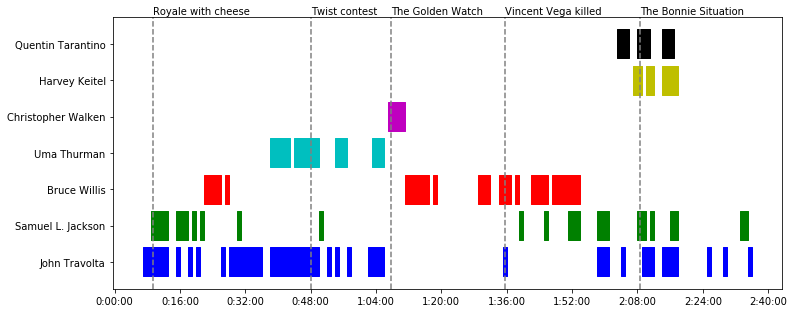

In [24]:
pf_events = {
    time_to_sec('01:35:38'): 'Vincent Vega killed',
    time_to_sec('00:09:20'): 'Royale with cheese',
    time_to_sec('02:08:35'): 'The Bonnie Situation',
    time_to_sec('00:48:00'): 'Twist contest',
    time_to_sec('01:07:39'): 'The Golden Watch',
}

visualize('Pulp Fiction', top_actors_count=7, events=pf_events)

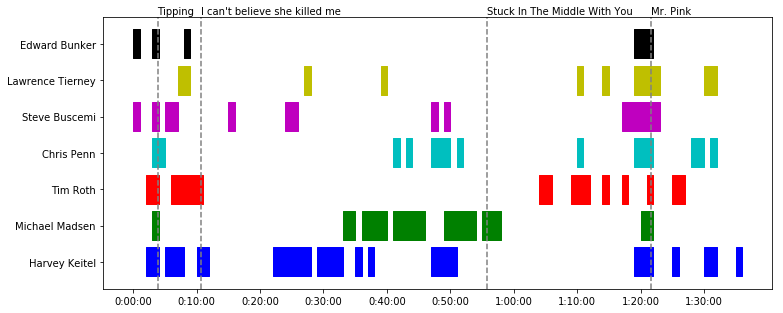

In [25]:
rd_events = {
    time_to_sec('00:03:50'): 'Tipping',
    time_to_sec('00:55:46'): 'Stuck In The Middle With You',
    time_to_sec('01:21:39'): 'Mr. Pink',
    time_to_sec('00:10:42'): "I can't believe she killed me",
}

visualize('Reservoir Dogs', top_actors_count=7, events=rd_events)